# 04 Stack Vs Concat In PyTorch, TensorFlow & NumPy - Deep Learning Tensor Ops

## Tensor Ops For Deep Learning: Concatenate Vs Stack
**In this episode, we will dissect the difference between concatenating and stacking tensors together. We’ll look at two examples, one with PyTorch, one with NumPy.**

## Existing Vs New Axes
The **difference** between **stacking** and **concatenating** tensors can be described in a single sentence, so here goes.

***Concatenating* joins a sequence of tensors along an *existing axis*, and *stacking* joins a sequence of tensors along a *new axis***.

And that’s all there is to it!

This is the **difference** between stacking and concatenating. However, the description here is kind of tricky, so let’s look at some **examples** to get a handle on what exactly how this can be better understood. We’ll look at stacking and concatenating in PyTorch, TensorFlow, and NumPy. Let’s do it.

For the most part, **concatenating** along an existing axis of a tensor is pretty **straight forward**. The confusion usually arises when we want to **concat along a new axis**. For this we **stack**. Another way of saying that we stack is to say that we **create a new axis and then concat on that axis**.

| **Join Method** | **Where** |
| -- | -- |
| Concatenate | Along an existing axis |
| Stack | Along a new axis|

For this reason, let’s be sure we know how to **create a new axis** for a given tensor, and then we’ll start stacking and concatenating.

### How To Add Or Insert An Axis Into A Tensor
To demonstrate this idea of adding an axis, we’ll use PyTorch.

In [1]:
import torch
t1 = torch.tensor([1,1,1])

Here, we’re importing PyTorch and creating a simple tensor that has **a single axis** of **length three**. Now, to **add an axis** to a tensor in PyTorch, we use the `unsqueeze()` function. Note that this is the opposite of squeezing.

In [2]:
t1.unsqueeze(dim=0)

tensor([[1, 1, 1]])

Here, we are we are **adding an axis**, a.k.a dimension at index zero of this tensor. This gives us a tensor with a shape of `1 x 3`. When we say index **zero of the tensor**, we mean the **first index** of the tensor's shape.

Now, we can also **add an axis** at the **second index** of this tensor.

In [3]:
t1.unsqueeze(dim=1)

tensor([[1],
        [1],
        [1]])

This gives us a tensor with a shape of `3 x 1`. Adding axes like this changes the way the data is organized inside the tensor, but it **does not change the data itself**. Basically, we are just **reshaping** the tensor. We can see that by checking the shape of each one of these.

In [4]:
print(t1.shape)

torch.Size([3])


In [5]:
print(t1.unsqueeze(dim=0).shape)

torch.Size([1, 3])


In [6]:
print(t1.unsqueeze(dim=1).shape)

torch.Size([3, 1])


Now, thinking back about concatenating verses stacking, when we **concat**, we are **joining a sequence of tensors along an existing axis**. This means that we are **extending the length of an existing axis**.

When we **stack**, we are **creating a new axis** that didn’t exist before and this happens across all the tensors in our sequence, and then we **concat along this new sequence**.

## Stack Vs Cat In PyTorch

With PyTorch the two functions we use for these operations are `stack` and `cat`. Let’s create a sequence of tensors.

In [7]:
import torch

t1 = torch.tensor([1,1,1])
t2 = torch.tensor([2,2,2])
t3 = torch.tensor([3,3,3])

Now, let’s **concatenate** these with one another. Notice that each of these tensors have **a single axis**. This means that the **result** of the cat function will also have **a single axis**. This is because when we concatenate, we do it along an **existing axis**. Notice that in this example, the only existing axis is the **first axis**.

In [8]:
torch.cat(
    (t1,t2,t3)
    ,dim=0
)

tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])

Alright, so we took **three single axis** tensors each having an axis length of three, and now we have a single tensor with **an axis length of nine**.依旧是一个中括号，维度没有增加

Now, let’s **stack** these tensors along a new axis that we’ll insert. We’ll insert an axis at the first index. Note that this insertion will be happening implicitly under the hood by the stack function.

In [9]:
torch.stack(
    (t1,t2,t3)
    ,dim=0
)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

This gives us a new tensor that has a shape of `3 x 3`. Notice how the three tensors are concatenated along the **first axis** of this tensor. Note that we can also **insert the new axis** explicitly, and preform the concatenation directly.现在的tensor变为了两个中括号，维度增加了一维


To see that this statement is true. Let’s **add a new axis** of length one to all of our tensors by **unsqueezing** them and then, **cat** along the **first axis**.

In [12]:
torch.cat(
    (
         t1.unsqueeze(0)
        ,t2.unsqueeze(0)
        ,t3.unsqueeze(0)
    )
    ,dim=0
)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

In this case, we can see that we get the **same result** that we got by **stacking**. However, the call to **stack** was **much cleaner** because the new axis insertion was handed by the stack function.

**Concatenation happens along an existing axis.**

Note that we **cannot** concat this sequence of tensors along the **second axis** because there currently is **no second axis in existence**, so in this case, stacking is our only option.

Let’s try stacking along the second axis.

In [13]:
torch.stack(
    (t1,t2,t3)
    ,dim=1
)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [14]:
# Alright, we stack with respect to the second axis and this is the result.
torch.cat(
    (
         t1.unsqueeze(1)
        ,t2.unsqueeze(1)
        ,t3.unsqueeze(1)
    )
    ,dim=1
)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

To understand this result, think back to what it looked like when we inserted a new axis at the end of the tensor. Now, we just do that to all our tensors, and we can cat them like so along the second axis. Inspecting the unsqueezed outputs can help make this solid.

In [15]:
t1.unsqueeze(1)

tensor([[1],
        [1],
        [1]])

In [16]:
t2.unsqueeze(1)

tensor([[2],
        [2],
        [2]])

In [17]:
t3.unsqueeze(1)

tensor([[3],
        [3],
        [3]])

## Stack Vs Concatenate In NumPy
Let's work with NumPy now.

In [18]:
import numpy as np

t1 = np.array([1,1,1])
t2 = np.array([2,2,2])
t3 = np.array([3,3,3])

In [19]:
# Here, we've created our three tensors. Now, let's concatenate them with one another.
np.concatenate(
    (t1,t2,t3)
    ,axis=0
)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

Alright, this gives us what we expect. Note that NumPy also used the axis parameter name, but here, we are also seeing another naming variation. NumPy uses the full word concatenate as the function name.

| **Library** | **Function Name** |
| -- | -- |
| PyTorch | `cat()` |
| NumPy | `concatenate() ` |

Okay, let's stack now.

In [20]:
np.stack(
    (t1,t2,t3)
    ,axis=0
)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [21]:
# As expected, the result is a rank-2 tensor with a shape of 3 x 3. Now, 
# we'll try the manual way.
np.concatenate(
    (
         np.expand_dims(t1, 0)
        ,np.expand_dims(t2, 0)
        ,np.expand_dims(t3, 0)
    )
    ,axis=0
)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

Note that the result is the **same** as when we used the `stack()` function. Additionally, observe that NumPy also uses the term `expand dims` for the function name.

Now, we'll finish this off by stacking using the **second axis**.

In [22]:
np.stack(
    (t1,t2,t3)
    ,axis=1
)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [23]:
# And, with manual insertion.
np.concatenate(
    (
         np.expand_dims(t1, 1)
        ,np.expand_dims(t2, 1)
        ,np.expand_dims(t3, 1)
    )
    ,axis=1
)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

## Stack Or Concat: Real-Life Examples
Here are three **concrete examples** that we can encounter in real life. Let’s decide when we need to **stack** and when we need to **concat**.

### Joining Images Into A Single Batch
Suppose we have **three individual images** as tensors. Each image tensor has **three dimensions**, a *channel axis*, a *height axis*, a *width axis*. Note that each of these tensors are **separate** from one another. Now, assume that our task is to join these tensors together to form **a single batch** tensor of three images.

*Do we concat or do we stack?*

Well, notice that in this example, there are **only three dimensions** in existence, and for a batch, we need **four dimensions**. This means that the answer is to **stack** the tensors along a **new axis**. This new axis will be the **batch axis**. This will give us a single tensor with four dimensions by adding one for the batch.

Note that **if** we join these three along any of the **existing dimensions**, we would be **messing up** either the channels, the height, or the width. We don’t want to mess our data up like that.

In [24]:
import torch
t1 = torch.zeros(3,28,28)
t2 = torch.zeros(3,28,28)
t3 = torch.zeros(3,28,28)

torch.stack(
    (t1,t2,t3)
    ,dim=0
).shape


torch.Size([3, 3, 28, 28])

### Joining Batches Into A Single Batch
Now, suppose we have the same **three images** as before, but this time the images **already have a dimension for the batch**. This actually means we have **three batches of size one**. Assume that it is our task to obtain **a single batch of three images**.

*Do we concat or stack?*

Well, notice how there is an **existing dimension** that we can concat on. This means that we concat these along the batch dimension. In this case there is **no need to stack**.

Here is a code example of this:

In [25]:
import torch
t1 = torch.zeros(1,3,28,28)
t2 = torch.zeros(1,3,28,28)
t3 = torch.zeros(1,3,28,28)
torch.cat(
    (t1,t2,t3)
    ,dim=0
).shape

torch.Size([3, 3, 28, 28])

### Joining Images With An Existing Batch
Suppose we have the same **three separate image tensors**. Only, this time, we already have **a `batch` tensor**. Assume our task is to join these three separate images with the batch.

*Do we concat or do we stack?*

Well, notice how the **batch axis already exists** inside the `batch` tensor. However, for the **images**, there is **no batch axis** in existence. This means neither of these will work. To join with stack or cat, we need the tensors to have **matching shapes**. So then, are we stuck? Is this impossible?

It is indeed possible. It’s actually a very common task. The answer is to **first stack** and **then to concat**.

We **first stack** the **three image** tensors with respect to the first dimension. This creates a new batch dimension of length three. Then, we can **concat** this new tensor with the `batch` tensor.

In [26]:
import torch
batch = torch.zeros(3,3,28,28)
t1 = torch.zeros(3,28,28)
t2 = torch.zeros(3,28,28)
t3 = torch.zeros(3,28,28)

torch.cat(
    (
        batch
        ,torch.stack(
            (t1,t2,t3)
            ,dim=0
        )
    )
    ,dim=0
).shape


torch.Size([6, 3, 28, 28])

In [27]:
# In the same way:
import torch
batch = torch.zeros(3,3,28,28)
t1 = torch.zeros(3,28,28)
t2 = torch.zeros(3,28,28)
t3 = torch.zeros(3,28,28)

torch.cat(
    (
        batch
        ,t1.unsqueeze(0)
        ,t2.unsqueeze(0)
        ,t3.unsqueeze(0)
    )
    ,dim=0
).shape


torch.Size([6, 3, 28, 28])

## Quiz 04
Q1:Concatenating a sequence of tensors joins them along _______________.  
A1:an existing axis

Q2:Stacking a sequence of tensors joins them along _______________.  
A2:a new axis

Q3:What will be the output of the code below?  
```python
t1 = torch.tensor([1,1,1])
t1.unsqueeze(dim=0)
```
A3:`tensor([[1, 1, 1]])`

Q4:In PyTorch, we concatenate using which function?  
A4:`cat()`

Q5:In NumPy, we concatenate using which function?  
A5:`concatenate()`

Q6:Suppose we have the three images below. Assume our task is to join these images into a single batch. How is this done in PyTorch?  
```python
t1 = torch.zeros(3,28,28)
t2 = torch.zeros(3,28,28)
t3 = torch.zeros(3,28,28)
```
A6:`torch.stack( (t1,t2,t3), dim=0 )`

Q7:Suppose we have the three single image batches below. Assume our task is to join these batches into a single batch. How is this done in PyTorch?
```python
t1 = torch.zeros(1,3,28,28)
t2 = torch.zeros(1,3,28,28)
t3 = torch.zeros(1,3,28,28)
```
A7:`torch.cat( (t1,t2,t3), dim=0 )`

Q8:Suppose we have a batch with three images, and we have three single images. This is expressed in the code below. Now, assume that our task is to join the three images with the batch. What are the steps?  
```python
batch = torch.zeros(3,3,28,28)
t1 = torch.zeros(3,28,28)
t2 = torch.zeros(3,28,28)
t3 = torch.zeros(3,28,28)
```
A8:stack the images then cat the result with the batch

---
---

# 05 TensorBoard With PyTorch - Visualize Deep Learning Metrics

## Using TensorBoard With PyTorch

**In this episode, we will learn how to use TensorBoard to visualize metrics of our CNN during the neural network training process.**

At this point in the series, we've just finished running our network through the training process. Now, we want to get more **metrics** about this process to better understand just what's going on under the hood.

Bird's eye view of where we are in the training process.
* Prepare the data
* Build the model
* Train the model
* Analyze the model's results
  * **Using TensorBoard for this**
  
## TensorBoard: TensorFlow's Visualization Toolkit

[TensorBoard](https://www.tensorflow.org/tensorboard/) provides the visualization and tooling needed for machine learning experimentation:
* Tracking and visualizing metrics such as loss and accuracy
* Visualizing the model graph (ops and layers)
* Viewing histograms of weights, biases, or other tensors as they change over time
* Projecting embeddings to a lower dimensional space
* Displaying images, text, and audio data
* Profiling TensorFlow programs
* And much more

In [2]:
import torch
print(torch.__version__)

1.6.0


In [3]:
from torch.utils.tensorboard import SummaryWriter

## Installing TensorBoard For PyTorch
To install TensorBoard for PyTorch, use the following steps:
1. Verify that you are running PyTorch version 1.1.0 or greater.
2. Verify that you are running TensorBoard version 1.15 or greater.
3. Note that the TensorBoard that PyTorch uses is the same TensorBoard that was created for TensorFlow. Check the version of TensorBoard installed on your system using the this command:
```python
tensorboard --version
```
4. Install TensorBoard using the following command.
```python
pip install tensorboard
```
5. After getting TensorBoard version 1.15 or greater installed, we're ready to go!

## Getting Started With TensorBoard For PyTorch
TensorBoard is a **front-end web interface** that essentially reads data from a file and displays it. To use TensorBoard our task is to get the data we want displayed saved to a file that TensorBoard can read.

To make this easy for us, PyTorch has created a utility class called `SummaryWriter`. To get access to this class we use the following import:
```python
from torch.utils.tensorboard import SummaryWriter
```

Once we have imported the class, we can create an instance of the class that we'll then use to get the data out of our program and onto the file system where it can then be consumed by TensorBoard.

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120) # Display options for output
torch.set_grad_enabled(True) # Already on by default

from torch.utils.tensorboard import SummaryWriter

In [12]:
print(torch.__version__)
print(torchvision.__version__)

1.6.0
0.7.0


In [13]:
def get_num_correct(preds,labels):
    return preds.argmax(dim = 1).eq(labels).sum().item()

In [14]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size = 5)
        
        self.fc1 = nn.Linear(in_features = 12*4*4,out_features = 120)
        self.fc2 = nn.Linear(in_features = 120,out_features = 60)
        self.out = nn.Linear(in_features = 60,out_features = 10)
        
    def forward(self,t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)

        return t

In [15]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

In [16]:
network = Network()

In [17]:
optimizer = optim.Adam(network.parameters(), lr=0.01)
train_loader = torch.utils.data.DataLoader(train_set,batch_size=100,shuffle=True)

### Network Graph And Training Set Images
The `SummaryWriter` class comes with a bunch of **method** that we can call to selectively pick and choose which data we want to be available to **TensorBoard**. We'll start by first by passing our network and a batch of images to the writer.

In [8]:
tb = SummaryWriter()

network = Network()
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb.add_image('images', grid)
tb.add_graph(network, images)
tb.close()

This code creates a `SummaryWriter` instance called `tb` for TensorBoard. Then, creates an instance of our PyTorch *network* and unpacks a batch of images and labels from our [PyTorch data loader object](https://deeplizard.com/learn/video/mUueSPmcOBc).

Then, the images and the network are added to the file that TensorBoard will consume. Effectively, we can say that the network **graph** and the batch of **images** have both been added to TensorBoard.

## Running TensorBoard

To launch TensorBoard, we need to run the tensorboard command at our terminal. This will launch a **local server** that will serve the TensorBoard UI and the the data our `SummaryWriter` wrote to disk.

By default, the PyTorch SummaryWriter object writes the data to disk in a directory called `./runs` that is created in the current working directory.

When we run the tensorboard command, we pass an argument that tells tensorboard where the data is. So it's like this:
```python
tensorboard --logdir=runs
```

The TensorBoard server will launch and be listening for http requests on port 6006. These details will be displayed in the console.

Access the TensorBoard UI by browsing to:
```python
http://localhost:6006
```

Here, we will be able to see our network graph and our image data. At the current moment, this does provide us with a visual, but it's not as useful as what comes next.

## TensorBoard Histograms And Scalars
The next import types of data we can add to TensorBoard is **numerical data**. We can add **scalar values** that will be displayed over time or over epoch. We can also add values to **histograms** to see frequency distributions of values.

To add scalars and histograms we use the corresponding methods provided by the PyTorch SummaryWriter class.

Here is an example of the calls:
```python
tb.add_scalar('Loss', total_loss, epoch)
tb.add_scalar('Number Correct', total_correct, epoch)
tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

tb.add_histogram('conv1.bias', network.conv1.bias, epoch)
tb.add_histogram('conv1.weight', network.conv1.weight, epoch)
tb.add_histogram('conv1.weight.grad', network.conv1.weight.grad, epoch)
```

And here is an example of where we would place these calls inside our **training loop**:

In [10]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb = SummaryWriter()
tb.add_image('images', grid)
tb.add_graph(network, images)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images,labels = batch

        preds = network(images)# Pass Batch
        loss = F.cross_entropy(preds,labels)# Calculate Loss
        
        optimizer.zero_grad()
        loss.backward()# Calculate Gradient
        optimizer.step()# Update Weights
        
        total_loss += loss.item()
        total_correct += get_num_correct(preds,labels)

    tb.add_scalar('Loss', total_loss, epoch)
    tb.add_scalar('Number Correct', total_correct, epoch)
    tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

    tb.add_histogram('conv1.bias', network.conv1.bias, epoch)
    tb.add_histogram('conv1.weight', network.conv1.weight, epoch)
    tb.add_histogram('conv1.weight.grad',network.conv1.weight.grad,epoch)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

tb.close()

epoch 0 total_correct: 46935 loss: 339.5066616535187
epoch 1 total_correct: 51087 loss: 238.97124218940735
epoch 2 total_correct: 51737 loss: 221.3547101765871
epoch 3 total_correct: 52177 loss: 209.68773962557316
epoch 4 total_correct: 52412 loss: 202.3382965028286
epoch 5 total_correct: 52498 loss: 200.30101904273033
epoch 6 total_correct: 52761 loss: 194.76089023053646
epoch 7 total_correct: 52934 loss: 191.10468831658363
epoch 8 total_correct: 52948 loss: 191.87293355166912
epoch 9 total_correct: 53159 loss: 185.86073012650013


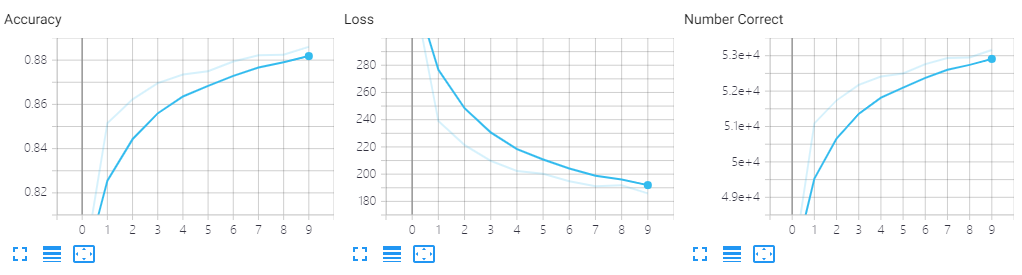

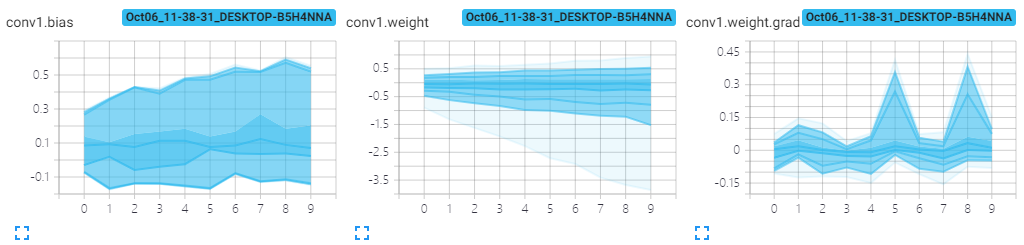

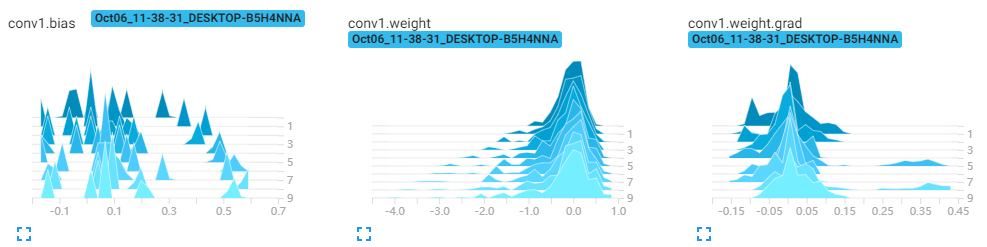

This will add these values to TensorBoard. The values even update in real-time as the network trains.

It is helpful to see the loss and accuracy values over time. However, we might need to admit that TensorBoard really isn't needed for this.

The **real power** of TensorBoard is its **out-of-the-box** capability of comparing **multiple runs**. This allows us to rapidly experiment by varying the hyperparameter values and comparing runs to see which parameters are working best.

## Quiz 05
Q1:Complete the `import` statement below:
```python
from torch.utils.tensorboard import ?
```
A1:SummaryWriter

Q2:TensorBoard is a _______________ interface that reads data from a file and displays it using various graphs.  
A2:front-end

Q3:To write data to files that TensorBoard can consume, which PyTorch class do we use?  
A3:SummaryWriter

Q4:To launch TensorBoard, we run the _______________ command at our terminal. This will launch a _______________ that will serve the TensorBoard UI and the the data produced by our PyTorch SummaryWriter.  
A4:tensorboard, server

Q5:By default, TensorBoard uses which port?  
A5:6006

Q6:How do we get the TensorBoard version in the terminal?  
A6:tensorboard --version_tb

Q7:What line of code should come right after the code below?  
```python
tb = SummaryWriter()

network = Network()
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb.add_image('images', grid)
tb.add_graph(network, images)
?
```
A7:tb.close()

Q8:What parameter do we pass to the tensorboard program to tell the program where the data is on disk?  
A8:--logdir

---
---

# 06 Hyperparameter Tuning And Experimenting - Training Deep Neural Networks

## Hyperparameter Tuning And Experimenting

**In this episode, we will see how we can use TensorBoard to rapidly experiment with different training hyperparameters to more deeply understand our neural network.**

* Prepare the data
* Build the model
* Train the model
* Analyze the model's results
  * Hyperparameter Experimentation
  
At this point in the series, we've seen how to build and train a CNN with PyTorch. In the last episode, we showed how to used TensorBoard with PyTorch, and we reviewed the training process.

This episode is considered to be a part two of the last one, so if you haven't seen the previous one yet, go ahead and check it out to get the details needed to understand what we are doing here. What we are doing now is experimenting with our hyperparameter values.

## Hyperparameter Experimentation Using TensorBoard
The best part about TensorBoard is its **out-of-the-box** capability of **tracking** our **hyperparameters** over time and across runs.<br>
<br>
<center><b>Changing hyperparameters and comparing the results.</b></center>
<br>




## Naming The Training Runs For TensorBoard

To take advantage of TensorBoard comparison capabilities, we need to do **multiple runs** and name each run in such a way that we can identify it **uniquely**.

With PyTorch's `SummaryWriter`, a run **starts** when the writer object instance is **created** and **ends** when the writer instance is **closed** or goes out of scope.

To **uniquely** identify each run, we can either set the **file name** of the run directly, or pass a **comment** string to the constructor that will be appended to the *auto-generated file name*.

At the time of the creation of this post, the name of the run is contained inside the `SummaryWriter` in an attribute called `log_dir`. It is created like this:

```python
# PyTorch version 1.1.0 SummaryWriter class
if not log_dir:
    import socket
    from datetime import datetime
    current_time = datetime.now().strftime('%b%d_%H-%M-%S')
    log_dir = os.path.join(
        'runs', 
        current_time + '_' + socket.gethostname() + comment
    )
self.log_dir = log_dir
```

Here, we can see that the `log_dir` attribute, which corresponds to the location on disk and the name of the run, is set to `runs + time + host + comment`. This is of course assuming that the `log_dir` parameter doesn't have a value that was passed in. Hence, this is the default behavior.

### Choosing A Name For The Run
One way to name the run is to add the parameter names and values as a **comment** for the run. This will allow us to see how each parameter value stacks up with the others later when we are reviewing the runs inside TensorBoard.

We'll see that this is how we set the comment up later:
```python
tb = SummaryWriter(comment=f' batch_size={batch_size} lr={lr}')
```

TensorBoard also has querying capabilities, so we can easily isolate parameter values though queries.

For example, imagine this SQL query:
<center><b>SELECT * FROM TBL_RUNS WHERE lr = 0.01 </b></center>
Without the SQL, this is basically what we can do inside TensorBoard.

## Creating Variables For Our Hyperparameters
To make the experimentation easy, we will pull out our hard-coded values and turn them into variables.

This is the hard-coded way:
```python
network = Network()
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=100
)
optimizer = optim.Adam(
    network.parameters(), lr=0.01
)
```

Notice how the `batch_size` and `lr` parameter values are hard-coded.

This is what we change it to (now our values are set using variables):
```python
batch_size = 100
lr = 0.01

network = Network()
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size
)
optimizer = optim.Adam(
    network.parameters(), lr=lr
)
```

This will allow us to change the values in a single place and have them propagate through our code.

Now, we will create the value for our comment parameter using the variables like so:
```python
tb = SummaryWriter(comment=f' batch_size={batch_size} lr={lr}')
```
With this setup, we can change the value of our hyperparameters and our runs will be automatically tracked and identifiable in TensorBoard.

## Calculate Loss With Different Batch Sizes
Since we'll be varying our **batch sizes** now, we'll need to make a change to the way we are calculating and accumulating the loss. Instead of just summing the loss returned by the loss function. We'll adjust it to **account** for the batch size.
```python
total_loss += loss.item() * batch_size
```

Why do this? We'll the `cross_entropy` loss function **averages** the loss values that are produced by the batch and then returns this average loss. This is why we need to account for the batch size.

There is a parameter that the `cross_entropy` function accepts called `reduction` that we could also use.

The reduction parameter optionally accepts a **string** as an **argument**. This parameter specifies the reduction to apply to the output of the loss function.
1. `'none'` - no reduction will be applied.
2. `'mean'` - the sum of the output will be divided by the number of elements in the output.
3. `'sum'` - the output will be summed.
**Note that the default is `'mean'`. This is why `loss.item() * batch_size works`.**

## Experimenting With Hyperparameter Values
Now that we have this setup, we can do more!

All we need to do is create some **lists** and some **loops**, and we can run the code and sit back and wait for all the **combinations** to run.

Here is an example of what we mean:

### Parameter Lists
```python
batch_size_list = [100, 1000, 10000]
lr_list = [.01, .001, .0001, .00001]
```

### Nested Iteration
```python
for batch_size in batch_size_list:
    for lr in lr_list:
        network = Network()

        train_loader = torch.utils.data.DataLoader(
            train_set, batch_size=batch_size
        )
        optimizer = optim.Adam(
            network.parameters(), lr=lr
        )

        images, labels = next(iter(train_loader))
        grid = torchvision.utils.make_grid(images)

        comment=f' batch_size={batch_size} lr={lr}'
        tb = SummaryWriter(comment=comment)
        tb.add_image('images', grid)
        tb.add_graph(network, images)

        for epoch in range(5):
            total_loss = 0
            total_correct = 0
            for batch in train_loader:
                images, labels = batch # Get Batch
                preds = network(images) # Pass Batch
                loss = F.cross_entropy(preds, labels) # Calculate Loss
                optimizer.zero_grad() # Zero Gradients
                loss.backward() # Calculate Gradients
                optimizer.step() # Update Weights

                total_loss += loss.item() * batch_size
                total_correct += get_num_correct(preds, labels)

            tb.add_scalar(
                'Loss', total_loss, epoch
            )
            tb.add_scalar(
                'Number Correct', total_correct, epoch
            )
            tb.add_scalar(
                'Accuracy', total_correct / len(train_set), epoch
            )

            for name, param in network.named_parameters():
                tb.add_histogram(name, param, epoch)
                tb.add_histogram(f'{name}.grad', param.grad, epoch)

            print(
                "epoch", epoch
                ,"total_correct:", total_correct
                ,"loss:", total_loss
            )  
        tb.close()
```
Once this code completes we run TensorBoard and all the runs will be displayed graphically and easily comparable.
```python
tensorboard --logdir runs
```

### Batch Size Vs Training Set Size
When the training set size is **not divisible** by the batch size, the last batch of data will contain fewer samples than the other batches.

One simple way to deal with this discrepancy is to **drop the last batch**. The PyTorch `DataLoader` class gives us the ability to do this by setting `drop_last=True`. By default the `drop_last` parameter value is set to `False`.

Let's consider how including a batch with **fewer** samples than our batch size affects our `total_loss` calculation in the code above.

For every batch, we are using the `batch_size` variable to update the `total_loss` value. We are scaling up the average loss value of the samples in the batch by the `batch_size` value. However, as we have just discussed, sometimes the last batch will contain **fewer samples**. Thus, scaling by the predefined `batch_size` value is **inaccurate**.

The code can be updated to be **more accurate** by dynamically accessing the number of samples for each batch.

Currently, we have the following:
<center><b>total_loss += loss.item() * batch_size</b><center>
    
Using the updated code below, we can achieve a **more accurate** `total_loss` value:
<center><b>total_loss += loss.item() * images.shape[0]</b><center>
    
Note that these two lines of code give us the **same `total_loss` value** when the training set size is **divisible** by the batch size.

## Adding More Hyperparameters Without Nesting
This is cool. However, what if we want to **add** a third or even a forth **parameter** to iterate on? We'll, this is going to get messy with many **nested for-loops**.

There is a solution. We can create a **set of parameters for each run**, and package all of them up in a single iterable. Here's how we do it.

If we have a list of parameters, we can package them up into a set for each of our runs using the [Cartesian product](https://en.wikipedia.org/wiki/Cartesian_product)笛卡尔积. For this we'll use the product function from the `itertools` library.
```python
from itertools import product
```
```python
Init signature: product(*args, **kwargs)
Docstring:     
"""
product(*iterables, repeat=1) --> product object
Cartesian product of input iterables.  Equivalent to nested for-loops.
"""
```

Next, we define a dictionary that contains parameters as keys and parameter values we want to use as values.
```python
parameters = dict(
    lr = [.01, .001]
    ,batch_size = [100, 1000]
    ,shuffle = [True, False]
)
```

Next, we'll create a list of iterables that we can pass to the `product` functions.



In [18]:
from itertools import product

In [19]:
parameters = dict(
    lr = [.01, .001]
    ,batch_size = [100, 1000]
    ,shuffle = [True, False]
)

In [20]:
param_values = [v for v in parameters.values()]
param_values

[[0.01, 0.001], [100, 1000], [True, False]]

Now, we have three lists of parameter values. After we take the `Cartesian product` of these three lists, we'll have a set of parameter values for each of our runs. Note that this is **equivalent to nested for-loops**, as the doc string of the product function indicates.

In [21]:
for lr, batch_size, shuffle in product(*param_values): 
    print (lr, batch_size, shuffle)

0.01 100 True
0.01 100 False
0.01 1000 True
0.01 1000 False
0.001 100 True
0.001 100 False
0.001 1000 True
0.001 1000 False


Alright, now we can iterate over each set of parameters using a **single for-loop**. All we have to do is unpack the set using sequence unpacking. It looks like this.

In [30]:
from itertools import product

In [31]:
parameters = dict(
    lr = [.01, .001]
    ,batch_size = [100, 1000]
    ,shuffle = [True, False]
)

param_values = [v for v in parameters.values()]
param_values

[[0.01, 0.001], [100, 1000], [True, False]]

In [32]:
for lr, batch_size, shuffle in product(*param_values): 
    print (lr, batch_size, shuffle)

0.01 100 True
0.01 100 False
0.01 1000 True
0.01 1000 False
0.001 100 True
0.001 100 False
0.001 1000 True
0.001 1000 False


In [33]:
network = Network()

In [35]:
for lr, batch_size, shuffle in product(*param_values): 
    comment = f' batch_size={batch_size} lr={lr} shuffle={shuffle}'

    train_loader = torch.utils.data.DataLoader(
        train_set
        ,batch_size=batch_size
        ,shuffle=shuffle 
    )

    optimizer = optim.Adam(
        network.parameters(), lr=lr
    )

    #batch_size = 100
    #lr =0.01

    images, labels = next(iter(train_loader))
    grid = torchvision.utils.make_grid(images)

    tb = SummaryWriter(comment=comment)
    tb.add_image('images', grid)
    tb.add_graph(network, images)

    for epoch in range(5):

        total_loss = 0
        total_correct = 0

        for batch in train_loader: # Get Batch
            images,labels = batch

            preds = network(images)# Pass Batch
            loss = F.cross_entropy(preds,labels)# Calculate Loss

            optimizer.zero_grad()
            loss.backward()# Calculate Gradient
            optimizer.step()# Update Weights

            total_loss += loss.item() * batch_size
            total_correct += get_num_correct(preds,labels)

        tb.add_scalar('Loss', total_loss, epoch)
        tb.add_scalar('Number Correct', total_correct, epoch)
        tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

        #tb.add_histogram('conv1.bias', network.conv1.bias, epoch)
        #tb.add_histogram('conv1.weight', network.conv1.weight, epoch)
        #tb.add_histogram('conv1.weight.grad',network.conv1.weight.grad,epoch)

        for name,weight in network.named_parameters():
            tb.add_histogram(name,weight,epoch)
            tb.add_histogram(f'{name}.grad',weight.grad,epoch)

        print("epoch", epoch, "total_correct:", total_correct, "loss:", total_loss)

    tb.close()
        # Rest of training process given the set of parameters

epoch 0 total_correct: 52637 loss: 19891.152721643448
epoch 1 total_correct: 53008 loss: 19167.039288580418
epoch 2 total_correct: 52988 loss: 18870.563922822475
epoch 3 total_correct: 53278 loss: 18310.201463103294
epoch 4 total_correct: 53342 loss: 18091.77584722638
epoch 0 total_correct: 53168 loss: 18768.856360018253
epoch 1 total_correct: 53167 loss: 18633.65612924099
epoch 2 total_correct: 53486 loss: 17885.47822982073
epoch 3 total_correct: 53544 loss: 17562.410466372967
epoch 4 total_correct: 53626 loss: 17287.45892867446
epoch 0 total_correct: 54434 loss: 14869.529604911804
epoch 1 total_correct: 54916 loss: 13181.718096137047
epoch 2 total_correct: 55145 loss: 12655.702576041222
epoch 3 total_correct: 55245 loss: 12386.82396709919
epoch 4 total_correct: 55292 loss: 12149.377718567848
epoch 0 total_correct: 55150 loss: 12699.76656138897
epoch 1 total_correct: 55436 loss: 11706.546202301979
epoch 2 total_correct: 55556 loss: 11351.040184497833
epoch 3 total_correct: 55549 loss:

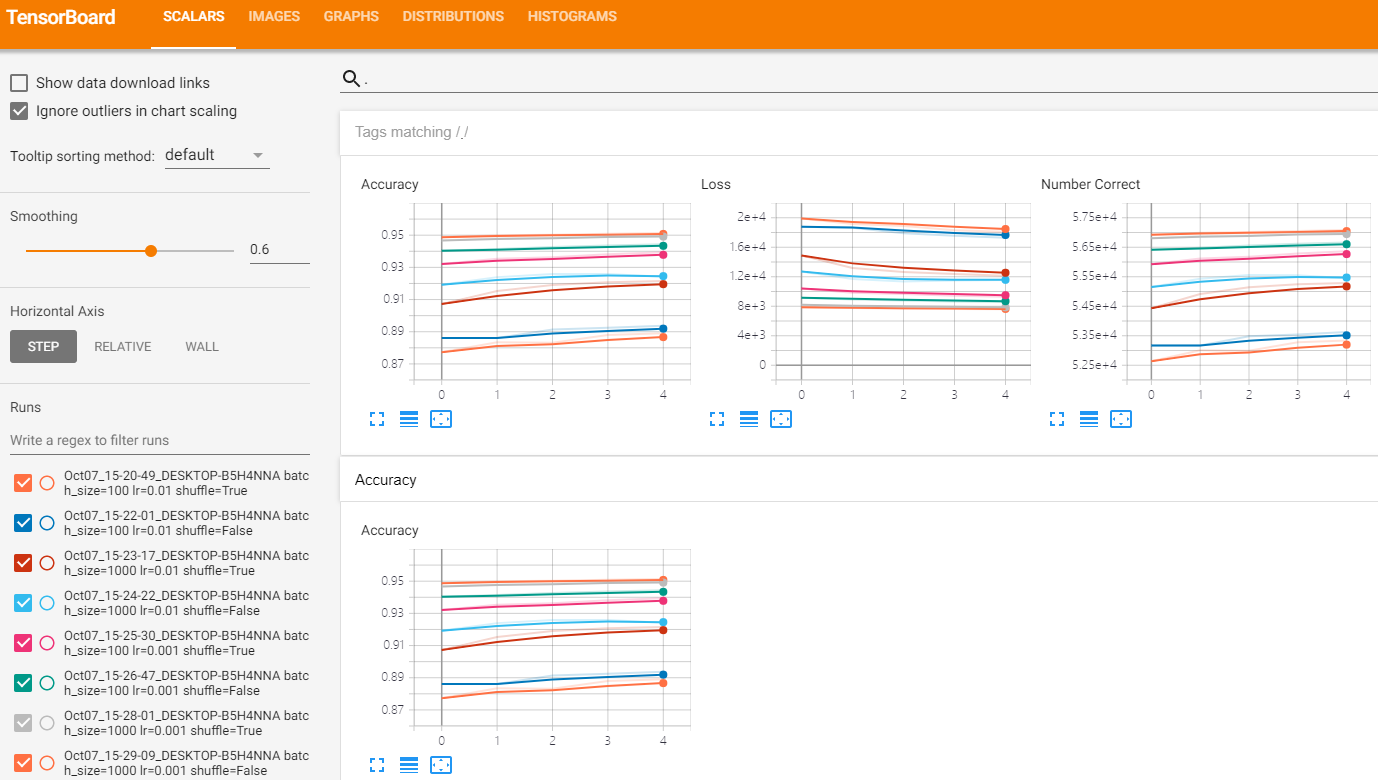

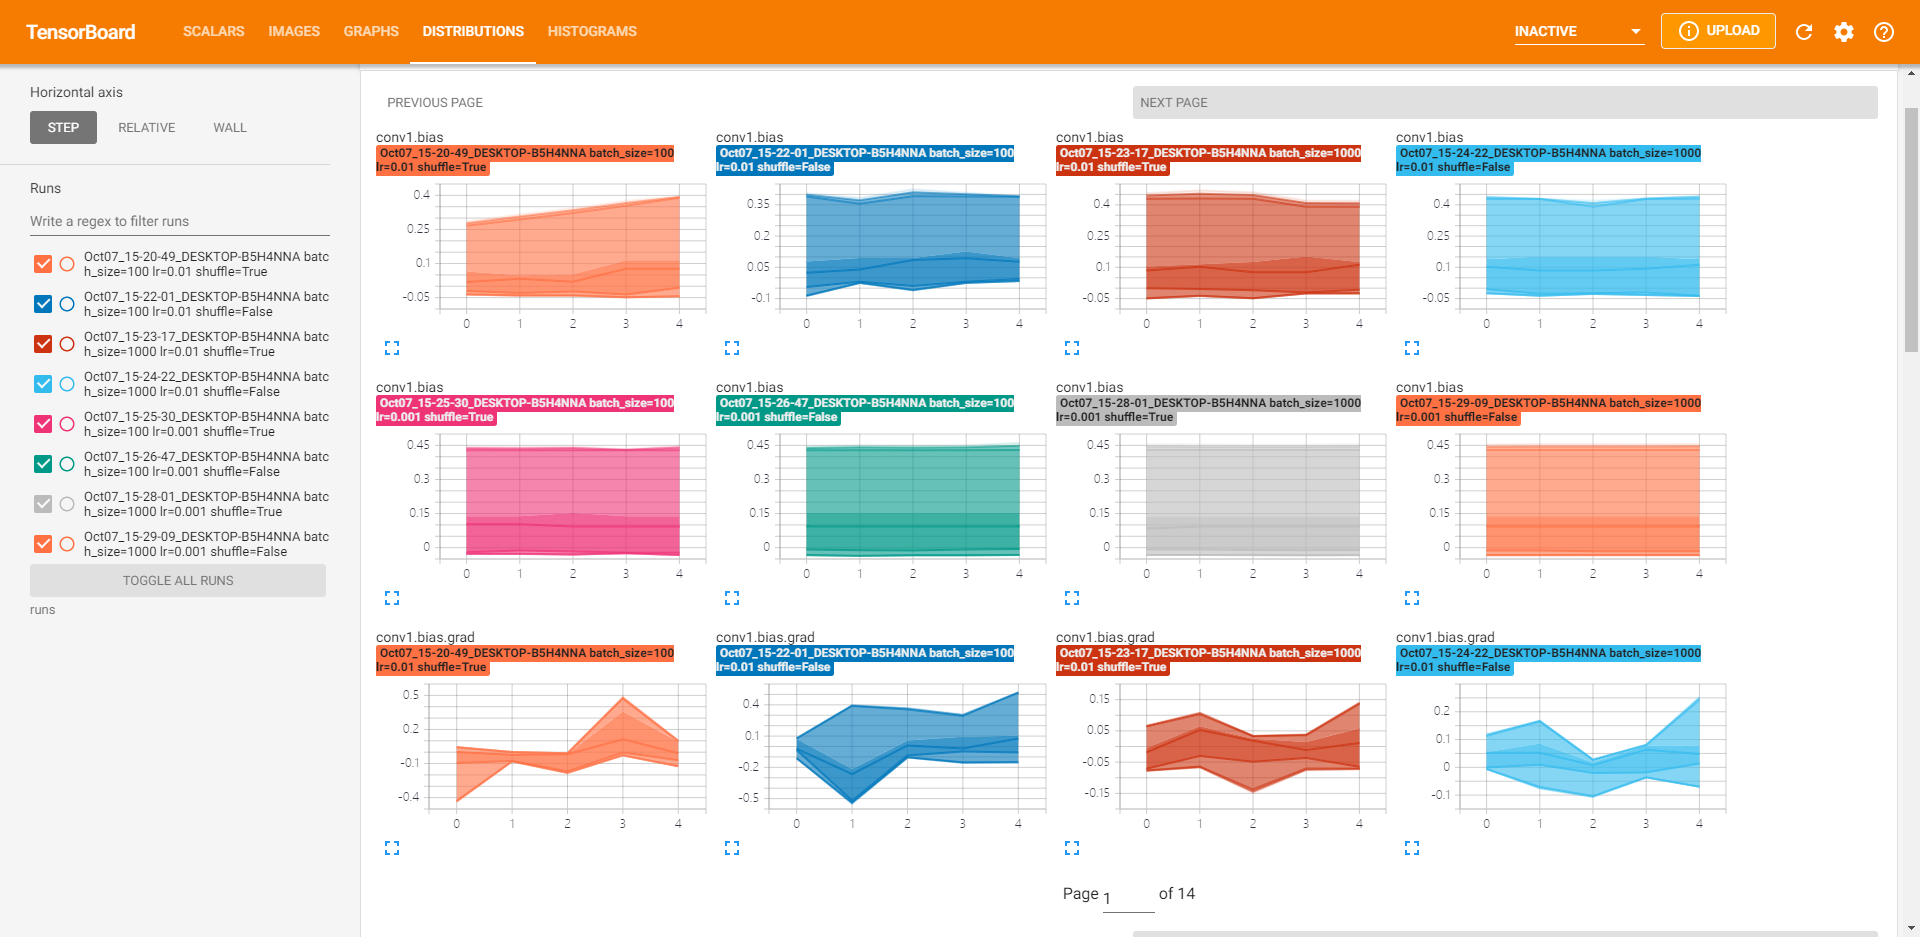

## Quiz 06
1. To uniquely identify each run using TensorBoard, we can either set the file name of the run directly, or pass a _______________ to the SummaryWriter constructor that will be appended to the auto-generated file name.
  * comment string


2. The code below is from the PyTorch version 1.1.0 SummaryWriter class. Complete this code by choosing the correct variable that should go where the question mark is located.
```python
if not log_dir:
    import socket
    from datetime import datetime
    current_time = datetime.now().strftime('%b%d_%H-%M-%S')
    log_dir = os.path.join(
        'runs', 
        current_time + '_' + socket.gethostname() + ?
    )
self.log_dir = log_dir
```
  * comment


3. In the code below, the term batch_size appears twice. How do we interpret this?
  * The parameter name is on the left and the parameter value as a variable is on the right.
  
  
4. If we want to compare the total loss values for runs that have different batch sizes, we need to normalize the total loss calculation using which operation? Note that this depends on the **reduction** operation inside the **loss function**. We are assuming the default behavior which is taking the `mean`.
```python
total_loss += loss.item() ? batch_size
```
  * *